<a href="https://colab.research.google.com/github/adrielpalestino9191/TI1/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Fernando Wario Vazquez  
**e-mail:** fernando.wario@academicos.udg.mx

## MODULES

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from IPython.core.magics import auto
from numpy.random.mtrand import beta
import plotly.express as px
import plotly.graph_objs as goo

## CLASSES

In [4]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0

![levy.png](attachment:levy.png)

In [4]:
 
resolution = 200
 
aux_domain = np.linspace(-np.pi, np.pi, resolution)
 
Levy_Exps = [0.5, 0.2, 0.54, 0.94,0.3]
 
fig_levy_stable_pdf = go.Figure()

for exps in Levy_Exps: 
    levy_stable_pdf = np.array([levy_stable.pdf(i, exps, 0) for i in aux_domain])
    fig_levy_stable_pdf.add_trace(go.Scatter(
      x = aux_domain,
      y = levy_stable_pdf,
      marker = dict(size=2),
      line = dict(width=2),
      mode = 'lines',
      name =f'levy_{exps}' 
    ))  

fig_levy_stable_pdf.update_layout(title_text='Levy_Stable')
fig_levy_stable_pdf.show()

  

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

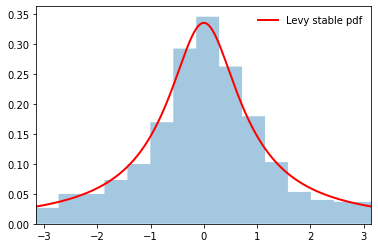

In [30]:
resolucion = 700
levy_exp = 0.9
beta = 0
aux_domain = np.linspace(-np.pi,np.pi,resolucion)

#figura con matplotlib
figg = plt.figure()

ax = figg.add_subplot(111)
#arreglo de datos
levy_stable_pdf = np.array([levy_stable.pdf(i, levy_exp, beta) for i in aux_domain])

levy_stable_data = levy_stable.rvs(levy_exp,beta,size=resolucion)
ax.set_xlim(aux_domain[0],aux_domain[-1])
 
ax.plot(aux_domain,levy_stable_pdf,'r-',lw=2,label='Levy stable pdf')
ax.hist(levy_stable_data,density=True,bins='auto',histtype='stepfilled',alpha=0.4)
ax.legend(loc='best',frameon=False)

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [22]:
pasos=500
cauchy=.4
lvw_exp=1
beta=0
std_pasos=3
speed=6

v= Vec2d(speed,0)
bm_3d_df = pd.DataFrame(columns=["x_pos","y_pos"])
temp_df=pd.DataFrame([{"x_pos":0,"y_pos":0}])
bm_3d_df= pd.concat([bm_3d_df,temp_df],ignore_index=True)

i=1
while(i<pasos):
  angulo= wrapcauchy.rvs(c=cauchy)
  v= v.rotated(angulo)

  #floor trunca el entero
  steps= abs(math.floor(levy_stable.rvs(alpha=lvw_exp, beta=beta ,loc=std_pasos)))
  if(i+steps>pasos):
    steps=pasos-i

  c_step = 0
  while(c_step<steps):
    temp_df = pd.DataFrame([{"x_pos":bm_3d_df.x_pos[i-1]+v.x,"y_pos":bm_3d_df.y_pos[i-1]+v.y}])
    bm_3d_df = pd.concat([bm_3d_df,temp_df],ignore_index=True)
    c_step = c_step + 1
    i = i +1

print(bm_3d_df)

t=np.linspace(0,1,steps)

#plt.axes(projection='3d')

fig = go.Figure()
aux_zdomain = np.linspace(0,1, pasos)

fig = go.Figure(data=go.Scatter3d(
    x=bm_3d_df.x_pos,
    y=bm_3d_df.y_pos,
    z=aux_zdomain,
    line=dict(width=3),
    name='trajectory',
        showlegend = True,
        mode="lines",

))
fig.show()

           x_pos       y_pos
0              0           0
1       0.619396   -5.967943
2       1.238792  -11.935887
3       6.443909   -8.951467
4      11.649026   -5.967048
..           ...         ...
495 -1364.238606  790.336737
496 -1369.896717  788.340294
497 -1375.554828  786.343852
498 -1381.212938  784.347409
499 -1378.929714  789.896002

[500 rows x 2 columns]


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [30]:
n_traj=5

pasos=500
cauchy=.4
lvw_exp=1
beta=0
std_pasos=3
speed=6
save_traject = pd.DataFrame(columns=["trayectoria"])
tempo_df=pd.DataFrame([{"trayectoria":[]}])
t=np.linspace(0,1,pasos)

 


fig = go.Figure()
aux_zdomain = np.linspace(0,1, pasos)



for ntrajectoria in range(n_traj):
 

  v= Vec2d(speed,0)
  bm_3d_df = pd.DataFrame(columns=["x_pos","y_pos"])
  temp_df=pd.DataFrame([{"x_pos":0,"y_pos":0}])
  bm_3d_df= pd.concat([bm_3d_df,temp_df],ignore_index=True)

  i=1
  while(i<pasos):
    angulo= wrapcauchy.rvs(c=cauchy)
    v= v.rotated(angulo)

    steps= abs(math.floor(levy_stable.rvs(alpha=lvw_exp, beta=beta ,loc=std_pasos)))
    if(i+steps>pasos):
      steps=pasos-i

    c_step = 0
    while(c_step<steps):
      temp_df = pd.DataFrame([{"x_pos":bm_3d_df.x_pos[i-1]+v.x,"y_pos":bm_3d_df.y_pos[i-1]+v.y}])
      bm_3d_df = pd.concat([bm_3d_df,temp_df],ignore_index=True)
      c_step = c_step + 1
      i = i +1
  temp_df = pd.DataFrame([{"x_pos":bm_3d_df.x_pos[i-1]+v.x,"y_pos":bm_3d_df.y_pos[i-1]+v.y}])
  temp_df = pd.concat([temp_df,temp_df],ignore_index=True)
  save_traject = pd.concat([save_traject,temp_df],ignore_index=True)
  bm_3d_df.to_pickle("./trayectorias"+str(ntrajectoria)+".pkl")
 # plt.plot(bm_3d_df.x_pos,bm_3d_df.y_pos)
  fig = go.Figure(data=go.Scatter3d(
      x=bm_3d_df.x_pos,
      y=bm_3d_df.y_pos,
      z=aux_zdomain,
      line=dict(width=3),
      name='trajectory',
          showlegend = True,
          mode="lines",

  ))
    
  fig.show()
   
 


